## 导入与下载数据

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings("ignore")

import quandl
import json

In [104]:
def getapi():
    with open('config.json') as f:
        config=json.load(f)
        return config['quandlapi']

In [105]:
quandl.ApiConfig.api_key=getapi()

In [106]:
tesla=quandl.get('WIKI/TSLA')
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [107]:
gm=quandl.get('WIKI/GM')
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


Text(0, 0.5, 'Price')

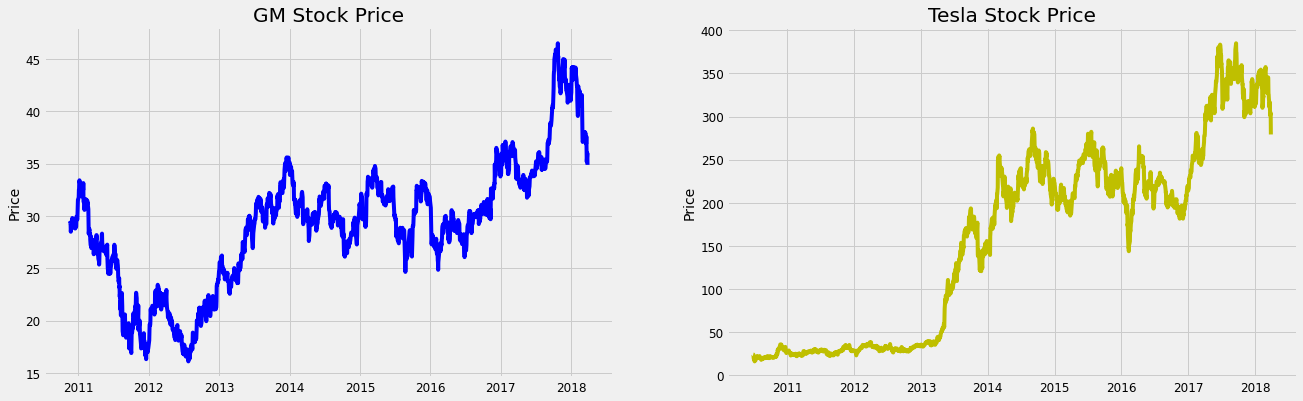

In [108]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.plot(gm.index, gm['Adj. Close'], color='b')
plt.title('GM Stock Price')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(tesla.index, tesla['Adj. Close'], color='y')
plt.title('Tesla Stock Price')
plt.ylabel('Price')

In [109]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

tesla.reset_index(level=0, inplace=True)
tesla['year']=tesla['Date'].dt.year
tesla['cap']=0

# 市值=股价*数量，计算市值。Quandl 没有免费的股票数量数据，但是我找到了两家公司的平均年度股票数
for i, year in enumerate(tesla['year']):
    shares=tesla_shares.get(year)
    tesla.loc[i, 'cap']=shares* tesla.loc[i, 'Adj. Close']

In [110]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,year,cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,1.218390e+09
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,1.215330e+09
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,1.119960e+09
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,9.792000e+08
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,8.216100e+08


In [111]:
gm.reset_index(level=0, inplace=True)
gm['year']=gm['Date'].dt.year
gm['cap']=0

# 市值=股价*数量，计算市值。Quandl 没有免费的股票数量数据，但是我找到了两家公司的平均年度股票数
for i, year in enumerate(gm['year']):
    shares=gm_shares.get(year)
    gm.loc[i, 'cap']=shares* gm.loc[i, 'Adj. Close']

In [112]:
gm.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,year,cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


In [113]:
# 合并，改名
cars=gm.merge(tesla, how='inner', on='Date')
cars.rename(columns={'cap_x':'gm_cap', 'cap_y':'tesla_cap'}, inplace=True)

In [114]:
cars=cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]
# 以亿美元为单位
cars['gm_cap']=cars['gm_cap']/1e8
cars['tesla_cap']=cars['tesla_cap']/1e8
cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,439.414525,15.2439
1,2010-11-19,440.314175,15.8049
2,2010-11-22,438.000790,17.0340
3,2010-11-23,427.333518,17.6307
4,2010-11-24,430.289509,18.0897


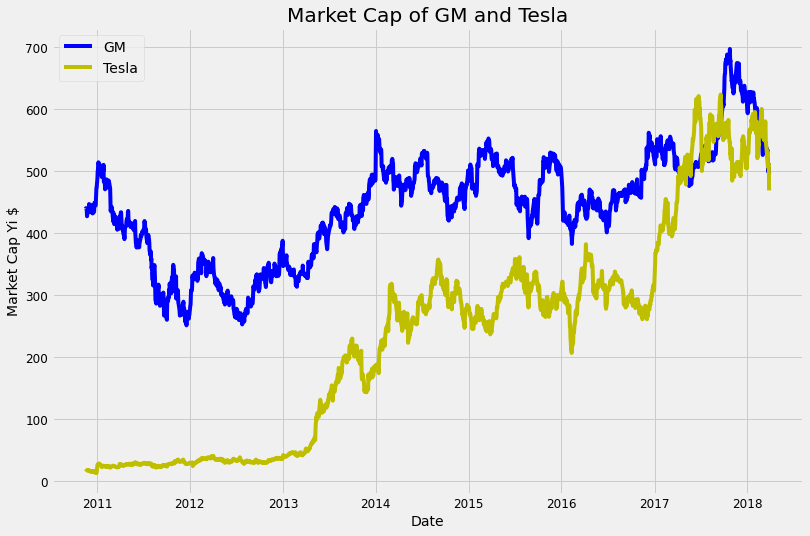

In [115]:
plt.figure(figsize=(12, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label='GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'y-', label='Tesla')
plt.xlabel('Date')
plt.ylabel('Market Cap Yi $')
plt.title('Market Cap of GM and Tesla')
plt.legend()

In [116]:
first_date=cars.loc[np.min(list(np.where(cars['tesla_cap']>cars['gm_cap'])[0])), 'Date']
last_date=cars.loc[np.max(list(np.where(cars['tesla_cap']>cars['gm_cap'])[0])), 'Date']
print('特斯拉的市值超过通用的时间段从{0}到{1}'.format(first_date.date(), last_date.date()))

特斯拉的市值超过通用的时间段从2017-04-10到2018-03-23


## fbprohet模型

In [117]:
import fbprophet as ph
# fbprophet需要的格式 ds (Date) 和 y (value)
gm=gm.rename(columns={'Date':'ds', 'cap':'y'})
gm['y'] = gm['y'] / 1e9
# 这个超参数用于控制趋势对变化的敏感程度，数值越高越敏感，数值越低越不敏感。由于股票日常变化很大，我们希望模型能够捕捉到这一点，所以我增加了灵活性以更好地拟合数据。
gm_prohpet=ph.Prophet(changepoint_prior_scale=0.05)
gm_prohpet.fit(gm)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Market Cap of GM')

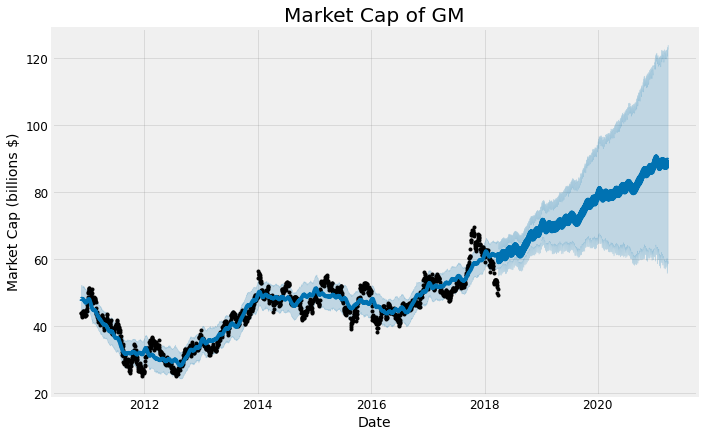

In [118]:
# 做3年预测的时间
gm_forecast=gm_prohpet.make_future_dataframe(periods=365*3, freq='D')
# 预测数据
gm_forecast=gm_prohpet.predict(gm_forecast)
# 预测绘图
gm_prohpet.plot(gm_forecast, xlabel='Date', ylabel='Market Cap (billions $)')
plt.title('Market Cap of GM')

In [119]:
tesla=tesla.rename(columns={'Date':'ds', 'cap':'y'})
tesla['y'] = tesla['y'] / 1e9

tesla_prohpet=ph.Prophet(changepoint_prior_scale=0.05)
tesla_prohpet.fit(tesla)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Market Cap of Tesla')

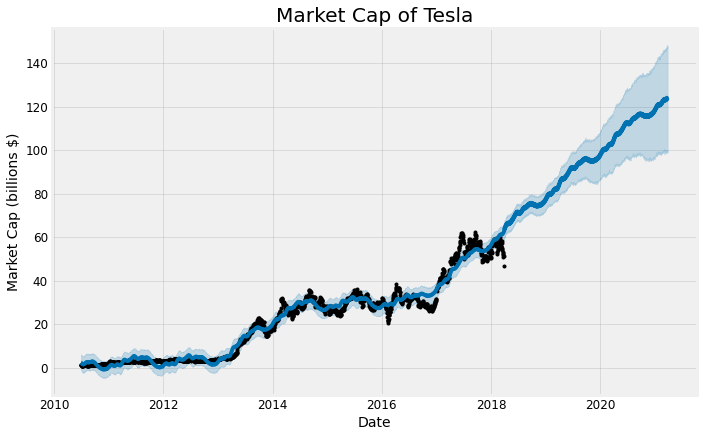

In [120]:
# 做3年预测的时间
tesla_forecast=tesla_prohpet.make_future_dataframe(periods=365*3, freq='D')
# 预测数据
tesla_forecast=tesla_prohpet.predict(tesla_forecast)
# 预测绘图
tesla_prohpet.plot(tesla_forecast, xlabel='Date', ylabel='Market Cap (billions $)')
plt.title('Market Cap of Tesla')

## Changepoint Prior Scale 作用

In [74]:
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model=ph.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(tesla)
    
    future=model.make_future_dataframe(periods=365*2, freq='D')
    future=model.predict(future)
    
    tesla[changepoint]=future['yhat']

Text(0.5, 1.0, 'Effect of Changepoint Prior Scale')

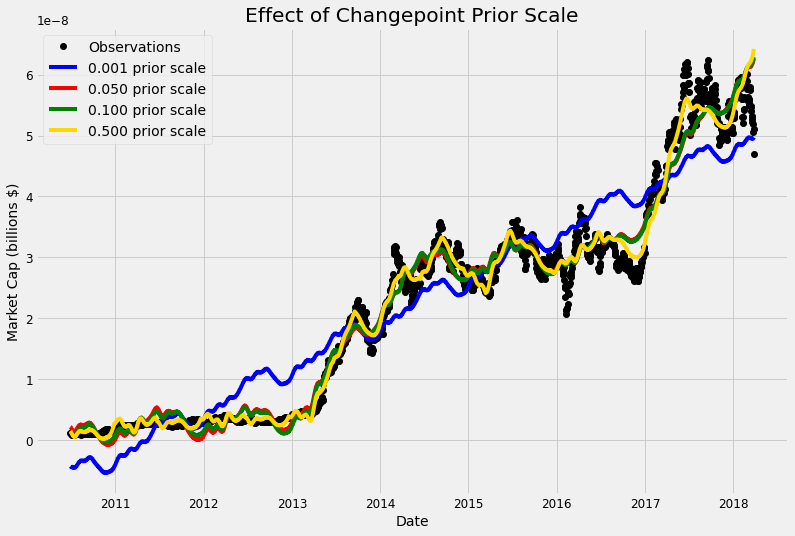

In [75]:
plt.figure(figsize=(12, 8))

plt.plot(tesla['ds'], tesla['y'], 'ko', label='Observations')
colors={0.001:'b', 0.05:'r', 0.1:'g', 0.5:'gold'}

for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(tesla['ds'], tesla[changepoint], color=colors[changepoint], label='%.3f prior scale'% changepoint)

plt.legend(prop={'size':14})
plt.xlabel('Date')
plt.ylabel('Market Cap (billions $)')
plt.title('Effect of Changepoint Prior Scale')

In [76]:
gm_prohpet.changepoints[:10]

59    2011-02-14
118   2011-05-10
177   2011-08-03
236   2011-10-26
296   2012-01-24
355   2012-04-18
414   2012-07-12
473   2012-10-04
532   2013-01-02
591   2013-03-28
Name: ds, dtype: datetime64[ns]

In [78]:
tesla_prohpet.changepoints[:10]

62    2010-09-27
125   2010-12-27
187   2011-03-25
249   2011-06-23
312   2011-09-22
374   2011-12-20
436   2012-03-21
499   2012-06-20
561   2012-09-18
623   2012-12-18
Name: ds, dtype: datetime64[ns]

## 对比预测

In [121]:
gm_names=['gm_%s'% column for column in gm_forecast.columns]
tesla_names=['tesla_%s'% column for column in tesla_forecast.columns]

merge_gm_forecast=gm_forecast.copy()
merge_tesla_forecast=tesla_forecast.copy()

merge_gm_forecast.columns=gm_names
merge_tesla_forecast.columns=tesla_names

In [122]:
gm_forecast['trend'].head()

0    46.931105
1    46.890932
2    46.770414
3    46.730241
4    46.690068
Name: trend, dtype: float64

In [123]:
tesla_forecast['trend'].head()

0    0.224707
1    0.236982
2    0.249257
3    0.261532
4    0.310633
Name: trend, dtype: float64

In [124]:
forecast=pd.merge(merge_gm_forecast, merge_tesla_forecast, how='inner', left_on='gm_ds', right_on='tesla_ds')
forecast=forecast.rename(columns={'gm_ds':'Date'}).drop('tesla_ds', axis=1)
forecast.head()

,Date,gm_trend,gm_yhat_lower,gm_yhat_upper,gm_trend_lower,gm_trend_upper,gm_additive_terms,gm_additive_terms_lower,gm_additive_terms_upper,gm_weekly,...,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_multiplicative_terms,tesla_multiplicative_terms_lower,tesla_multiplicative_terms_upper,tesla_yhat
0,2010-11-18,46.931105,44.098295,52.284049,46.931105,46.931105,1.297567,1.297567,1.297567,0.684308,...,-0.222957,-0.222957,-0.222957,-2.427646,-2.427646,-2.427646,0.0,0.0,0.0,-0.682822
1,2010-11-19,46.890932,44.447061,52.401249,46.890932,46.890932,1.277325,1.277325,1.277325,0.625272,...,-0.250112,-0.250112,-0.250112,-2.464203,-2.464203,-2.464203,0.0,0.0,0.0,-0.734259
2,2010-11-22,46.770414,44.426776,52.369923,46.770414,46.770414,1.438768,1.438768,1.438768,0.646909,...,-0.166332,-0.166332,-0.166332,-2.563412,-2.563412,-2.563412,0.0,0.0,0.0,-0.712861
3,2010-11-23,46.730241,44.298760,52.332883,46.730241,46.730241,1.447286,1.447286,1.447286,0.605557,...,-0.195212,-0.195212,-0.195212,-2.592746,-2.592746,-2.592746,0.0,0.0,0.0,-0.758800
4,2010-11-24,46.690068,44.249829,51.955226,46.690068,46.690068,1.574149,1.574149,1.574149,0.683324,...,-0.157252,-0.157252,-0.157252,-2.620111,-2.620111,-2.620111,0.0,0.0,0.0,-0.735930


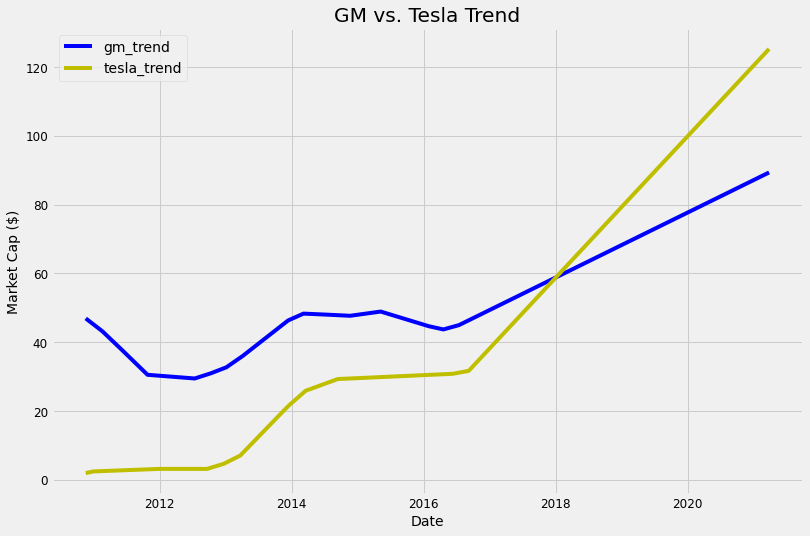

In [125]:
plt.figure(figsize=(12, 8))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-', label='gm_trend')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'y-', label='tesla_trend')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend'); 

Text(0.5, 1.0, 'GM vs. Tesla Estimate')

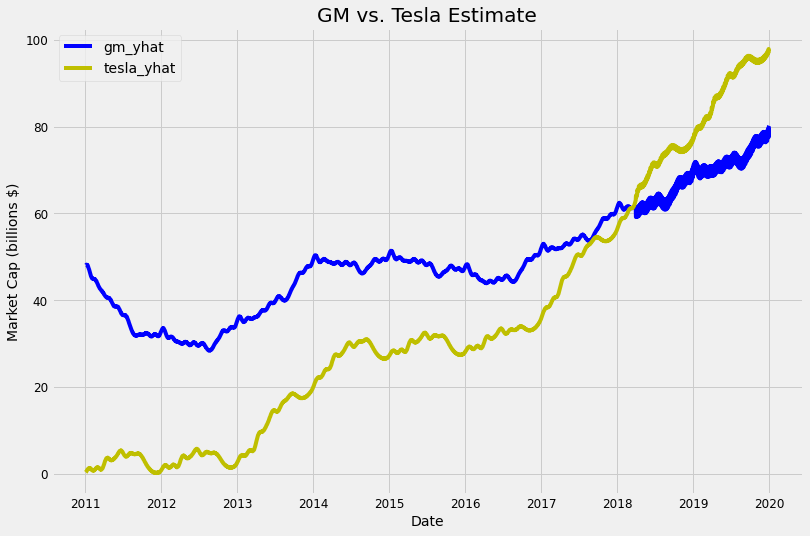

In [131]:
plt.figure(figsize=(12, 8))
plt.plot(forecast['Date'], forecast['gm_yhat'], 'b-', label='gm_yhat')
plt.plot(forecast['Date'], forecast['tesla_yhat'], 'y-', label='tesla_yhat')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap (billions $)')
plt.title('GM vs. Tesla Estimate')

In [129]:
overtake_date = min(forecast.loc[forecast['tesla_yhat'] > forecast['gm_yhat'], 'Date'])
print('Tesla overtakes GM on {}'.format(overtake_date.date()))

Tesla overtakes GM on 2018-03-12


In [130]:
# Only keep years 2011 onwards and from before 2020
forecast = forecast[forecast['Date'] > '2010-12-31']
forecast = forecast[forecast['Date'] < '2020-01-01']

Text(0.5, 1.0, 'Market Cap Prediction for GM and Tesla')

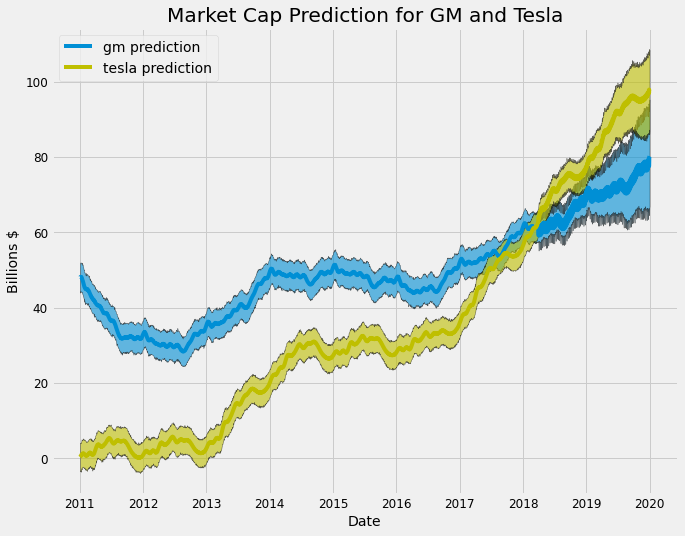

In [142]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8));

# Plot estimate
ax.plot(forecast['Date'], forecast['gm_yhat'], label = 'gm prediction');

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');

# Plot estimate and uncertainty for tesla
ax.plot(forecast['Date'], forecast['tesla_yhat'], 'y', label = 'tesla prediction');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], forecast['tesla_yhat_lower'], alpha=0.6, color='y', edgecolor = 'k');
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Billions $')
plt.title('Market Cap Prediction for GM and Tesla')

## 趋势与模式

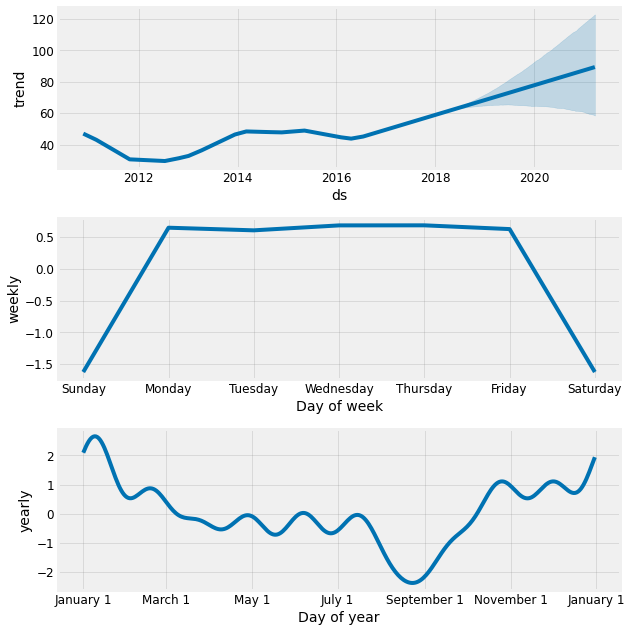

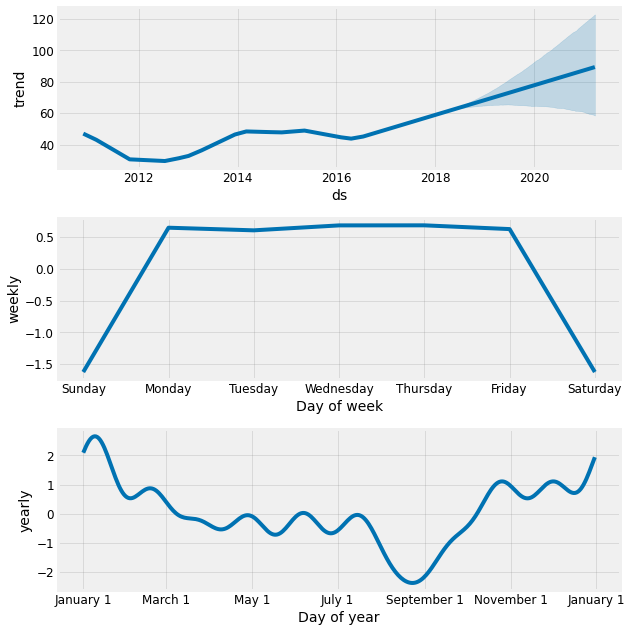

In [146]:
gm_prohpet.plot_components(gm_forecast)

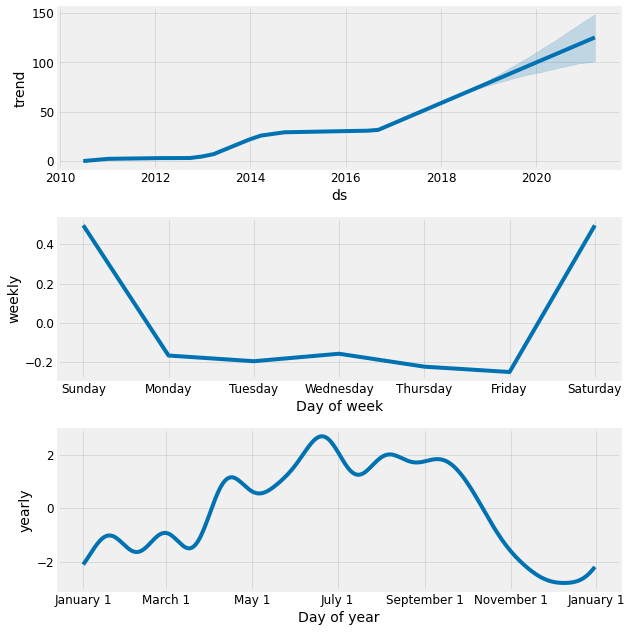

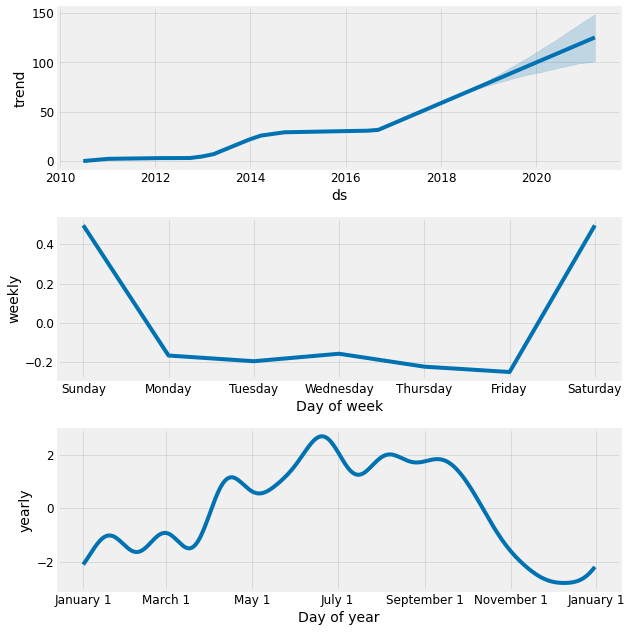

In [147]:
tesla_prohpet.plot_components(tesla_forecast)

## 对比中美GDP

In [177]:
us_gdp=quandl.get('FRED/GDP', collapse='quarterly', start_date='19501231', end_date='20191231')
cn_gdp=quandl.get('ODA/CHN_NGDPD', collapse='yearly', start_date='19501231', end_date='20191231')

In [178]:
us_gdp

,Value
Date,
1951-03-31,336.000
1951-06-30,344.090
1951-09-30,351.385
1951-12-31,356.178
1952-03-31,359.820
...,...
2018-12-31,20909.853
2019-03-31,21115.309
2019-06-30,21329.877


In [179]:
cn_gdp

,Value
Date,
1980-12-31,305.348
1981-12-31,290.827
1982-12-31,286.719
1983-12-31,307.677
1984-12-31,316.628
1985-12-31,312.616
1986-12-31,303.340
1987-12-31,330.303
1988-12-31,411.923


Text(0, 0.5, 'Billion $')

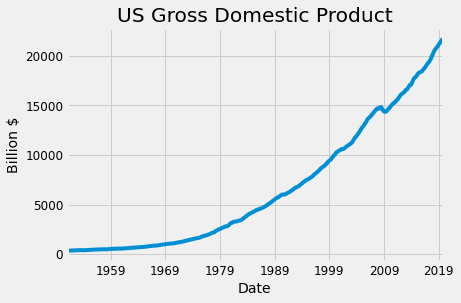

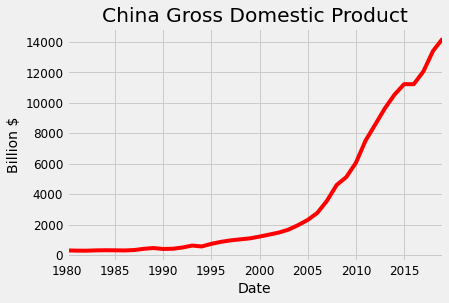

In [180]:
us_gdp.plot(title = 'US Gross Domestic Product', legend=None);
plt.ylabel('Billion $')
cn_gdp.plot(title = 'China Gross Domestic Product', color = 'r', legend=None);
plt.ylabel('Billion $')

In [181]:
us_gdp=us_gdp.reset_index(level=0)
cn_gdp=cn_gdp.reset_index(level=0)

In [182]:
gdp=us_gdp.merge(cn_gdp, on ='Date', how='left').rename(columns={'Value_x':'US', 'Value_y':'China'})
gdp.head()

,Date,US,China
0,1951-03-31,336.000,NaN
1,1951-06-30,344.090,NaN
2,1951-09-30,351.385,NaN
3,1951-12-31,356.178,NaN
4,1952-03-31,359.820,NaN


In [183]:
round(gdp.describe(), 2)

,US,China
count,276.00,40.00
mean,6541.78,3526.05
std,6309.55,4370.36
min,336.00,286.72
25%,928.10,414.68
50%,4340.83,1156.03
75%,11011.90,5357.85
max,21747.39,14216.50


In [184]:
gdp=gdp.fillna(method='bfill')

Text(0.5, 1.0, 'US and China GDP')

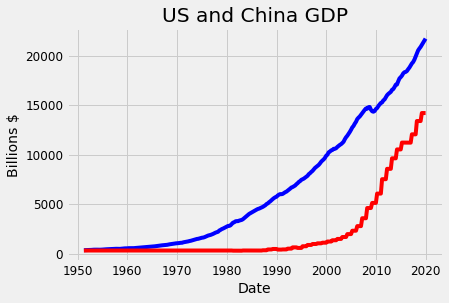

In [185]:
plt.plot(gdp['Date'], gdp['US'], label = 'US', color =  'b')
plt.plot(gdp['Date'], gdp['China'], label = 'China', color = 'r')
plt.ylabel('Billions $')
plt.xlabel('Date')
plt.title('US and China GDP')

In [186]:
us_prophet=ph.Prophet(changepoint_prior_scale=0.2)
cn_prophet=ph.Prophet(changepoint_prior_scale=0.2)

us_gdp=us_gdp.rename(columns={'Date':'ds', 'Value': 'y'})
cn_gdp=cn_gdp.rename(columns={'Date':'ds', 'Value': 'y'})

In [187]:
us_prophet.fit(us_gdp)
cn_prophet.fit(cn_gdp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [188]:
us_prophet.changepoints

9     1953-06-30
18    1955-09-30
26    1957-09-30
35    1959-12-31
44    1962-03-31
53    1964-06-30
61    1966-06-30
70    1968-09-30
79    1970-12-31
88    1973-03-31
96    1975-03-31
105   1977-06-30
114   1979-09-30
123   1981-12-31
131   1983-12-31
140   1986-03-31
149   1988-06-30
158   1990-09-30
166   1992-09-30
175   1994-12-31
184   1997-03-31
193   1999-06-30
201   2001-06-30
210   2003-09-30
219   2005-12-31
Name: ds, dtype: datetime64[ns]

In [189]:
cn_prophet.changepoints

1    1981-12-31
2    1982-12-31
4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
Name: ds, dtype: datetime64[ns]

In [191]:
us_forecast = us_prophet.make_future_dataframe(periods = 50, freq = 'Y')
us_forecast = us_prophet.predict(us_forecast)

cn_forecast = cn_prophet.make_future_dataframe(periods = 50, freq = 'Y')
cn_forecast = cn_prophet.predict(cn_forecast)

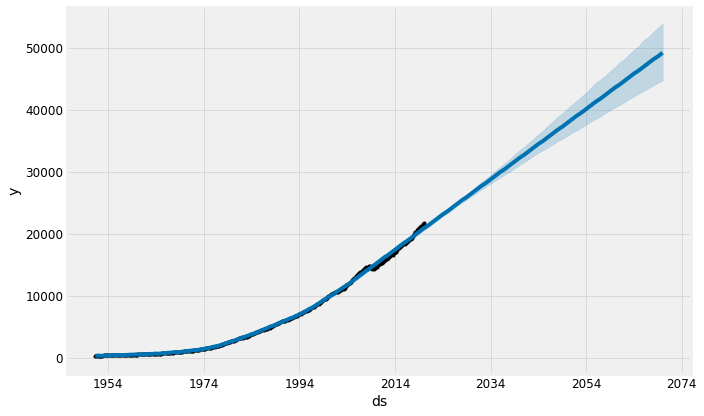

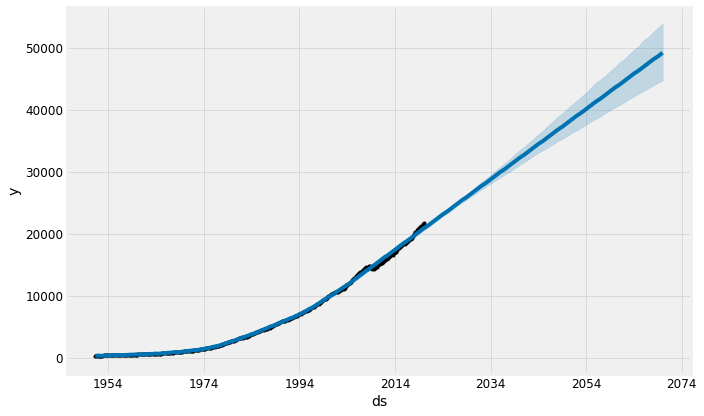

In [193]:
us_prophet.plot(us_forecast)

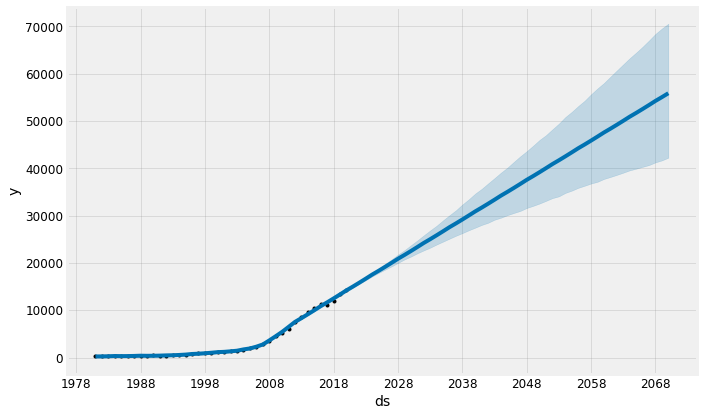

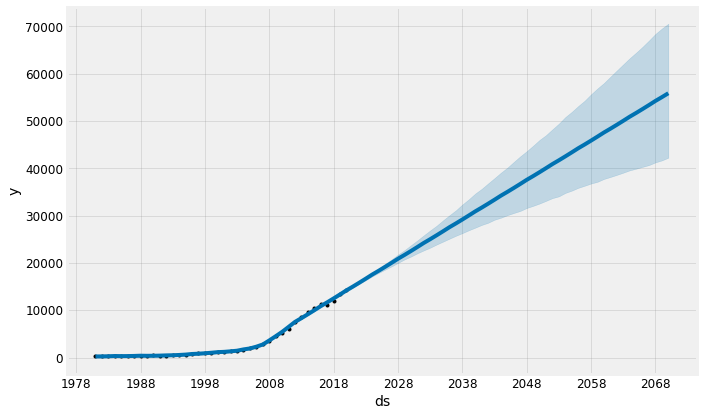

In [194]:
cn_prophet.plot(cn_forecast)

## 中国什么时候超过美国

In [196]:
us_names = ['us_%s' % column for column in us_forecast.columns]
cn_names = ['china_%s' % column for column in cn_forecast.columns]

# Dataframes to merge
merge_us_forecast = us_forecast.copy()
merge_cn_forecast = cn_forecast.copy()

# Rename the columns
merge_us_forecast.columns = us_names
merge_cn_forecast.columns = cn_names

In [197]:
# Merge the two datasets
gdp_forecast = pd.merge(merge_us_forecast, merge_cn_forecast, how = 'inner', left_on = 'us_ds', right_on = 'china_ds')

# Rename date column
gdp_forecast = gdp_forecast.rename(columns={'us_ds': 'Date'}).drop('china_ds', axis=1)
gdp_forecast.head()

,Date,us_trend,us_yhat_lower,us_yhat_upper,us_trend_lower,us_trend_upper,us_additive_terms,us_additive_terms_lower,us_additive_terms_upper,us_yearly,...,china_additive_terms,china_additive_terms_lower,china_additive_terms_upper,china_yearly,china_yearly_lower,china_yearly_upper,china_multiplicative_terms,china_multiplicative_terms_lower,china_multiplicative_terms_upper,china_yhat
0,1980-12-31,3518.912995,2668.219203,3234.567270,3518.912995,3518.912995,-574.418924,-574.418924,-574.418924,-574.418924,...,-678.196042,-678.196042,-678.196042,-678.196042,-678.196042,-678.196042,0.0,0.0,0.0,247.106957
1,1981-12-31,3784.710431,2915.483214,3507.070423,3784.710431,3784.710431,-554.501732,-554.501732,-554.501732,-554.501732,...,-685.394486,-685.394486,-685.394486,-685.394486,-685.394486,-685.394486,0.0,0.0,0.0,256.288832
2,1982-12-31,4063.232341,3228.231332,3791.573096,4063.232341,4063.232341,-533.820099,-533.820099,-533.820099,-533.820099,...,-673.065919,-673.065919,-673.065919,-673.065919,-673.065919,-673.065919,0.0,0.0,0.0,284.997719
3,1983-12-31,4341.754252,3570.322444,4127.825624,4341.754252,4341.754252,-512.395568,-512.395568,-512.395568,-512.395568,...,-641.247474,-641.247474,-641.247474,-641.247474,-641.247474,-641.247474,0.0,0.0,0.0,333.196483
4,1984-12-31,4651.758713,3794.479968,4379.711232,4651.758713,4651.758713,-574.418924,-574.418924,-574.418924,-574.418924,...,-678.196042,-678.196042,-678.196042,-678.196042,-678.196042,-678.196042,0.0,0.0,0.0,312.673112


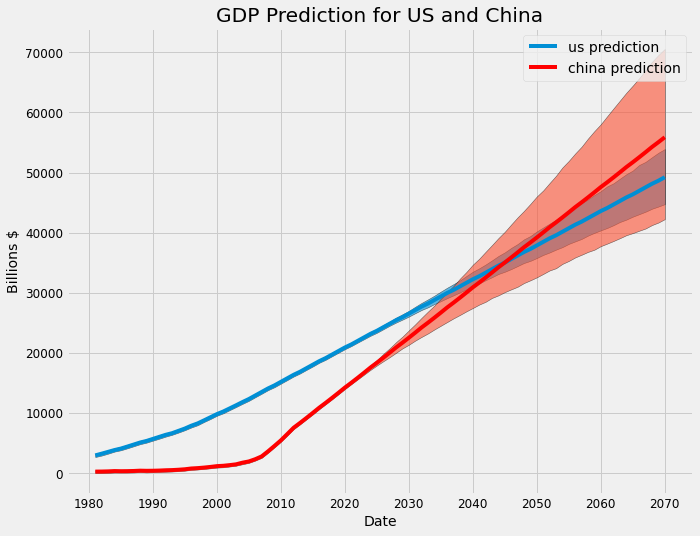

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8));

ax.plot(gdp_forecast['Date'], gdp_forecast['us_yhat'], label = 'us prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['us_yhat_upper'], gdp_forecast['us_yhat_lower'], alpha=0.6, edgecolor = 'k');

ax.plot(gdp_forecast['Date'], gdp_forecast['china_yhat'], 'r', label = 'china prediction');
ax.fill_between(gdp_forecast['Date'].dt.to_pydatetime(), gdp_forecast['china_yhat_upper'], gdp_forecast['china_yhat_lower'], alpha=0.6, edgecolor = 'k');

plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('GDP Prediction for US and China');

In [200]:
first_pass = min(gdp_forecast.loc[gdp_forecast['us_yhat'] < gdp_forecast['china_yhat'], 'Date'])
print('China will overtake the US in GDP on {}.'.format(first_pass.date()))

China will overtake the US in GDP on 2044-12-31.
